# Proyecto ABP – Módulo 4  
## Fundamentos del Análisis de Datos  

**Autor:** Joselyn Mena C  
**Curso:** Fundamentos del Análisis de Datos  
**Módulo:** 4 

---

### Objetivo

Desarrollar un flujo completo de análisis de datos utilizando Pandas y NumPy, aplicando técnicas de limpieza, transformación, agregación y visualización para la toma de decisiones basada en datos.

## 1. Contexto del Proyecto

Se desarrolló un pipeline automatizado en Python compuesto por:

- Carga de datos (CSV y Excel)
- Limpieza y tratamiento de valores nulos
- Eliminación de outliers mediante IQR
- Transformación y creación de nuevas variables
- Agregaciones y tablas dinámicas (pivot)
- Reestructuración de datos con melt
- Exportación de resultados finales

En este notebook se analiza e interpreta el dataset final generado por el pipeline.

### Importaciones

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración visual básica
plt.rcParams["figure.figsize"] = (8,5)

### Cargar Dataset Final

In [9]:
df = pd.read_csv("data/processed/dataset_final.csv")

df.head()

,venta_id,cliente_id,fecha_venta,producto_id,cantidad,precio_unitario,total_venta,canal_venta,nombre,apellido,...,activo,nombre_producto,categoria_id,nombre_categoria,año,mes,ticket_promedio,segmento_ingreso,rango_edad,total_normalizado
0,2025-001,158,2025-03-06,5,2,664605,1329210,Tienda Física,Sebastián,Silva,...,False,Audífonos,2,Accesorios,2025,3,664605.0,Alto,Adulto,0.415281
1,2025-002,29,2025-12-01,6,1,19821,19821,Web,Juan,Martínez,...,True,Tablet,1,Tecnología,2025,12,19821.0,Medio,Adulto,0.003033
2,2025-003,115,2025-10-23,3,2,382110,764220,Web,Camila,Araya,...,True,Teclado,2,Accesorios,2025,10,382110.0,Alto,Adulto,0.237400
3,2025-004,206,2025-08-07,3,1,22236,22236,Web,Pedro,Flores,...,False,Teclado,2,Accesorios,2025,8,22236.0,Medio,Senior,0.003793
4,2025-005,82,2025-01-01,5,3,549521,1648563,App,Juan,Pérez,...,False,Audífonos,2,Accesorios,2025,1,549521.0,Medio,Joven,0.515827


### Inspección General 

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   venta_id           982 non-null    str    
 1   cliente_id         982 non-null    int64  
 2   fecha_venta        982 non-null    str    
 3   producto_id        982 non-null    int64  
 4   cantidad           982 non-null    int64  
 5   precio_unitario    982 non-null    int64  
 6   total_venta        982 non-null    int64  
 7   canal_venta        982 non-null    str    
 8   nombre             982 non-null    str    
 9   apellido           982 non-null    str    
 10  email              982 non-null    str    
 11  genero             982 non-null    str    
 12  fecha_registro     982 non-null    str    
 13  region             962 non-null    str    
 14  pais               982 non-null    str    
 15  edad               982 non-null    int64  
 16  ingreso_mensual    982 non-null    fl

### Análisis de estructura del dataset

El dataset final contiene 982 registros y 27 variables.

Se observa consistencia en los tipos de datos, con variables numéricas (int64, float64), categóricas (object) y booleanas.

Se identifican algunos valores nulos en la variable "region", lo cual puede estar asociado a información incompleta en el registro de clientes.

In [11]:
df.describe()

,cliente_id,producto_id,cantidad,precio_unitario,total_venta,edad,ingreso_mensual,categoria_id,año,mes,ticket_promedio,total_normalizado
count,982.000000,982.000000,982.000000,9.820000e+02,9.820000e+02,982.000000,9.820000e+02,982.000000,982.0,982.000000,9.820000e+02,982.000000
mean,150.288187,3.460285,2.493890,4.041889e+05,9.962888e+05,42.984725,1.488452e+06,1.514257,2025.0,6.735234,4.041889e+05,0.310464
std,86.347138,1.692446,1.141142,2.511941e+05,7.700185e+05,15.041389,5.656033e+05,0.500051,0.0,3.351200,2.511941e+05,0.242433
min,1.000000,1.000000,1.000000,1.018800e+04,1.018800e+04,18.000000,5.012520e+05,1.000000,2025.0,1.000000,1.018800e+04,0.000000
25%,76.500000,2.000000,1.000000,1.947440e+05,3.838672e+05,30.000000,1.013758e+06,1.000000,2025.0,4.000000,1.947440e+05,0.117649
50%,153.000000,3.000000,3.000000,3.988695e+05,7.402095e+05,43.000000,1.528518e+06,2.000000,2025.0,7.000000,3.988695e+05,0.229840
75%,224.750000,5.000000,3.750000,6.061872e+05,1.488497e+06,55.000000,1.928127e+06,2.000000,2025.0,10.000000,6.061872e+05,0.465431
max,299.000000,6.000000,4.000000,2.803159e+06,3.186400e+06,69.000000,2.482243e+06,2.000000,2025.0,12.000000,2.803159e+06,1.000000


### Ventas por Categoría

In [12]:
ventas_categoria = (
    df.groupby("nombre_categoria")["total_venta"]
    .sum()
    .reset_index()
)

ventas_categoria

,nombre_categoria,total_venta
0,Accesorios,491288844
1,Tecnología,487066790


### Análisis de ventas por categoría

Ambas categorías presentan volúmenes de ventas similares, con una ligera diferencia a favor de Accesorios.

La baja dispersión entre categorías sugiere una estructura de ingresos equilibrada.

### Ventas por mes

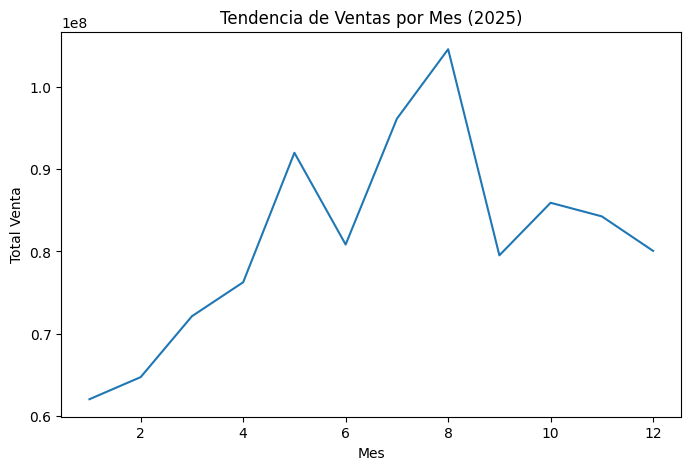

In [15]:
ventas_mes = (
    df.groupby(["año","mes"])["total_venta"]
    .sum()
    .reset_index()
)

plt.figure()
plt.plot(ventas_mes["mes"], ventas_mes["total_venta"])
plt.title("Tendencia de Ventas por Mes (2025)")
plt.xlabel("Mes")
plt.ylabel("Total Venta")
plt.show()

### Análisis de tendencia temporal

Se observa una tendencia creciente en las ventas durante el primer semestre del año, alcanzando un punto máximo alrededor del mes 8.

Posteriormente se identifica una caída en el mes 9, seguida de una estabilización en los meses finales.

Este comportamiento puede estar asociado a factores estacionales, campañas comerciales o variaciones en la demanda del mercado.

### Tabla Pivot

In [16]:
pivot = df.pivot_table(
    values="total_venta",
    index="nombre_categoria",
    columns="canal_venta",
    aggfunc="sum"
)

pivot

canal_venta,App,Tienda Física,Web
nombre_categoria,,,
Accesorios,180782593,161880893,148625358
Tecnología,169502639,149875164,167688987


### Heatmap

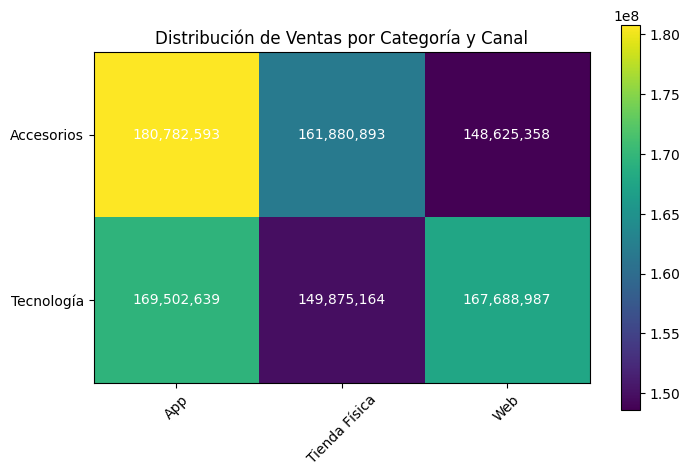

In [18]:
plt.figure()

plt.imshow(pivot)

plt.colorbar()

plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)

# Agregar valores dentro del heatmap
for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        plt.text(j, i,
                 f"{pivot.iloc[i, j]:,.0f}",
                 ha="center",
                 va="center",
                 color="white")

plt.title("Distribución de Ventas por Categoría y Canal")
plt.show()

### Análisis cruzado: Categoría vs Canal

El análisis cruzado evidencia diferencias en la contribución de ventas según canal y categoría.

- En la categoría Accesorios, el canal App concentra el mayor volumen.
- En Tecnología, el canal Web presenta una mayor participación.
- Tienda Física muestra menor volumen relativo en ambas categorías.

Esto sugiere comportamientos de consumo diferenciados según tipo de producto y canal de distribución.

### Distribución del Ticket Promedio

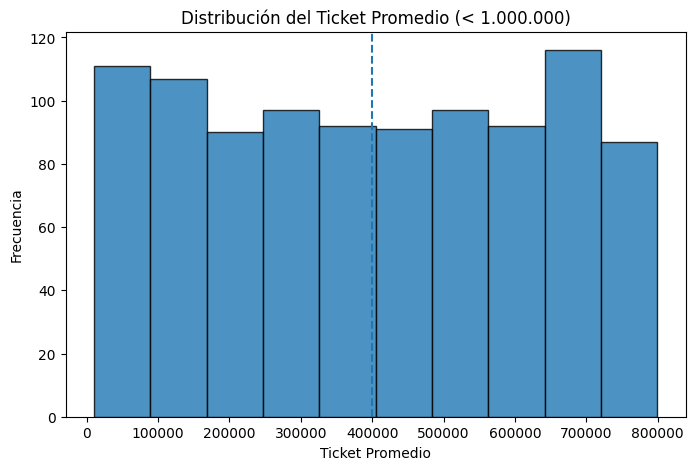

In [24]:
plt.figure()

ticket_filtrado = df[df["ticket_promedio"] < 1000000]["ticket_promedio"]

plt.hist(ticket_filtrado, bins=10, edgecolor="black", alpha=0.8)

media = ticket_filtrado.mean()
plt.axvline(media, linestyle="--")

plt.title("Distribución del Ticket Promedio (< 1.000.000)")
plt.xlabel("Ticket Promedio")
plt.ylabel("Frecuencia")

plt.show()

### Distribución del Ticket Promedio

La distribución del ticket promedio muestra una concentración de valores en rangos intermedios, lo que indica que la mayoría de las transacciones presentan montos similares.

Se observa una ligera asimetría positiva, evidenciada por la presencia de algunos valores más elevados que desplazan el promedio hacia la derecha. 

La línea de media permite visualizar que el valor promedio se encuentra dentro del rango de mayor frecuencia, aunque influenciado por transacciones de mayor monto.

Esto sugiere un comportamiento relativamente estable en el gasto promedio, con algunos casos puntuales de alto valor que incrementan la dispersión.

## Conclusiones Generales del Análisis

A partir del análisis exploratorio realizado sobre el dataset de ventas, se identifican los siguientes hallazgos principales:

1. **Estructura del dataset**  
   El conjunto de datos presenta consistencia en tipos de variables y un volumen adecuado de registros para análisis descriptivo. Se detectaron algunos valores nulos en variables específicas, sin afectar significativamente la integridad del análisis.

2. **Tendencia temporal de ventas**  
   Se observa variabilidad mensual en el volumen de ventas, con períodos de mayor actividad que podrían estar asociados a estacionalidad o campañas comerciales.

3. **Distribución por categoría y canal**  
   Las ventas presentan diferencias según categoría y canal de distribución, lo que sugiere comportamientos de consumo distintos dependiendo del tipo de producto y medio de venta.

4. **Ticket promedio**  
   La distribución del ticket promedio muestra una leve asimetría positiva, con concentración en rangos medios y presencia de valores extremos que incrementan la dispersión.

---

## Insights Estratégicos

- Existe potencial para analizar estacionalidad y planificar campañas en meses de mayor desempeño.
- La segmentación por canal podría optimizar estrategias comerciales específicas por categoría.
- El monitoreo de tickets elevados puede aportar información sobre clientes de alto valor.

---

## Recomendaciones

- Implementar análisis segmentado por región o perfil de cliente para profundizar el comportamiento de consumo.
- Evaluar campañas focalizadas en los meses de menor rendimiento.
- Realizar análisis predictivo en etapas posteriores para estimar tendencias futuras.